# Análisis Exploratorio de Datos con R
El presente cuaderno muestra las principales operaciones de *data wrangling* (manejo de dataframes), así como el cálculo de estadísticos descriptivos y la visualización de gráficos básicos, es decir, las operaciones que componen un análisis exploratorio de datos clásico.

### Datos:

In [ ]:
set.seed(2021) #Establecemos una semilla para facilitar la reproductibilidad de los resultados
#Creamos un dataset con una columna de IDs, cuatro variables continuas (altura, sexo, edad e ingresos) y una categórica (sexo), y 250 observaciones:
#Altura y Peso estarán correlacionadas (a mayor altura, mayor peso), y lo mismo la edad y los ingresos:
library(MASS) #Librería necesaria para crear datos correlacionados
cov_Altura_Peso <- 0.7*sqrt((30^2)*(20^2)) #La covarianza entre X e Y es igual al producto de su correlación por sus desviaciones típicas
cov_Edad_Ingresos <- 0.4*sqrt((15^2)*(5000^2))
cov_matriz <- rbind(c(30^2, cov_Altura_Peso, 0, 0), #Matriz de varianzas - covarianzas
                    c(cov_Altura_Peso, 20^2, 0, 0),
                    c(0, 0, 15^2, cov_Edad_Ingresos),
                    c(0, 0, cov_Edad_Ingresos, 5000^2))
mu <- c(165, 65, 30, 15000) 
datos1_Altura_Peso_Edad_Ingresos <- as.data.frame(mvrnorm(n=250, mu=mu, Sigma=cov_matriz))
datos1 <- data.frame(
  ID = seq(from=1, to=250), #Los IDs serán los números entre 1 y 250
  Sexo = sample(c("Hombre", "Mujer"), 250, replace=TRUE), #Seleccionamos al azar, 250 veces, entre las categorías Hombre y Mujer
  Altura = abs(datos1_Altura_Peso_Edad_Ingresos[,1]), #La altura sigue una normal N(165, 30). Usamos la función abs() (valor absoluto), para evitar alturas negativas
  Peso = abs(datos1_Altura_Peso_Edad_Ingresos[,2]),  #El peso sigue una normal N(65, 30). Usamos la función abs(), para evitar pesos negativos
  Edad = abs(datos1_Altura_Peso_Edad_Ingresos[,3]), #La edad sigue una normal N(30, 15). Usamos la función abs(), para evitar edades negativas
  Ingresos = abs(datos1_Altura_Peso_Edad_Ingresos[,4]) #Los ingresos siguen una normal N(15000, 10000). Usamos la función abs(), para evitar ingresos negativos  
)
head(datos1)
print("------------------------------------")
#Creamos un segundo dataset con la misma estructura que el anterior, pero solo 50 observaciones:
datos2_Altura_Peso_Edad_Ingresos <- as.data.frame(mvrnorm(n=50, mu=mu, Sigma=cov_matriz))
datos2 <- data.frame(
  ID = seq(251, 300), #Los IDs serán los números entre 251 y 300
  Sexo = sample(c("Hombre", "Mujer"), 50, replace=TRUE),
  Altura = abs(datos2_Altura_Peso_Edad_Ingresos[,1]),
  Peso = abs(datos2_Altura_Peso_Edad_Ingresos[,2]), 
  Edad = abs(datos2_Altura_Peso_Edad_Ingresos[,3]),
  Ingresos = abs(datos2_Altura_Peso_Edad_Ingresos[,4])
)
head(datos2)
print("------------------------------------")
#Creamos un tercer dataset con una columnas de IDs y columna de Estatus laboral (Categórica), y 300 observaciones:
datos3 = data.frame(
  ID = seq(1, 300),
  Estatus_laboral = sample(c("Parado", "Ocupado"), 300, replace=TRUE)
)
head(datos3)

,ID,Sexo,Altura,Peso,Edad,Ingresos
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Mujer,162.2949,87.57508,32.23449,14387.697
2,2,Hombre,150.9919,59.98314,14.17056,17762.306
3,3,Hombre,104.9447,42.74725,31.06938,16743.249
4,4,Mujer,134.8377,63.22315,16.53988,16798.180
5,5,Hombre,180.0655,61.19098,29.48357,19490.276
6,6,Mujer,162.6079,70.03465,25.05756,5387.144


[1] "------------------------------------"


,ID,Sexo,Altura,Peso,Edad,Ingresos
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,251,Hombre,151.71062,58.95047,28.53955,9096.833
2,252,Mujer,136.83698,50.81321,24.22455,2854.414
3,253,Hombre,121.98865,26.03998,13.31929,15286.741
4,254,Mujer,168.75960,71.48658,45.70904,27556.962
5,255,Mujer,182.29443,68.97265,26.93471,6839.853
6,256,Hombre,97.25125,27.82591,48.83620,20781.905


[1] "------------------------------------"


,ID,Estatus_laboral
,<int>,<chr>
1,1,Ocupado
2,2,Parado
3,3,Parado
4,4,Parado
5,5,Ocupado
6,6,Ocupado


### Concatenación de datasets:
Vamos a unir verticalmente (uno debajo del otro) los datasets datos1 y datos2

In [ ]:
datos_1_2 = rbind(datos1, datos2)
nrow(datos_1_2) #Comprobamos que la longitud del nuevo dataset es de 300

[1] 300

### Unión (*join*) de datasets:
Vamos a unir el anterior dataset *datos_1_2* con el dataset *datos3* horizontalmente (columnas al lado de columnas), usando la columna de IDs como nexo de unión.

In [ ]:
datos_final = merge(x=datos_1_2, y=datos3, by="ID")
nrow(datos_final)
head(datos_final) #Comprobamos que tenemos 300 observaciones y todas las columnas

[1] 300

,ID,Sexo,Altura,Peso,Edad,Ingresos,Estatus_laboral
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,Mujer,162.2949,87.57508,32.23449,14387.697,Ocupado
2,2,Hombre,150.9919,59.98314,14.17056,17762.306,Parado
3,3,Hombre,104.9447,42.74725,31.06938,16743.249,Parado
4,4,Mujer,134.8377,63.22315,16.53988,16798.180,Parado
5,5,Hombre,180.0655,61.19098,29.48357,19490.276,Ocupado
6,6,Mujer,162.6079,70.03465,25.05756,5387.144,Ocupado


### Cambiar nombre de filas y columnas del dataframe:
Como tenemos una columna de IDs identificativa de cada una de las 300 observaciones, vamos a cambiar el nombre de las filas (números del 0 al 299), por los valores de la columna ID (números del 1 al 300):


In [ ]:
rownames(datos_final) <- datos_final$ID #Renombramos el índice de las filas con los valores de la columna ID
#Eliminamos la columna ID, ya que no nos hace falta:
datos_final$ID <- NULL
#Cambiamos el nombre de la columna Ingresos por "Ingresos_mensuales":
names(datos_final)[names(datos_final) == "Ingresos"] <- "Ingresos_mensuales"
head(datos_final)

,Sexo,Altura,Peso,Edad,Ingresos_mensuales,Estatus_laboral
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Mujer,162.2949,87.57508,32.23449,14387.697,Ocupado
2,Hombre,150.9919,59.98314,14.17056,17762.306,Parado
3,Hombre,104.9447,42.74725,31.06938,16743.249,Parado
4,Mujer,134.8377,63.22315,16.53988,16798.180,Parado
5,Hombre,180.0655,61.19098,29.48357,19490.276,Ocupado
6,Mujer,162.6079,70.03465,25.05756,5387.144,Ocupado


### Función summary():
Con las función summary() podemos obtener los estadísticos descriptivos básicos de forma muy rápida.

En el caso de las variables continuas nos da la media, la mediana, el máximo, el mínimo y los cuartiles.

En el caso de las categóricas, nos da el recuento y el tipo de dato.

In [ ]:
summary(datos_final)

     Sexo               Altura            Peso             Edad        
 Length:300         Min.   : 90.37   Min.   : 14.18   Min.   : 0.6578  
 Class :character   1st Qu.:145.06   1st Qu.: 53.42   1st Qu.:20.8638  
 Mode  :character   Median :166.60   Median : 65.28   Median :29.4357  
                    Mean   :167.43   Mean   : 66.56   Mean   :30.1906  
                    3rd Qu.:187.91   3rd Qu.: 80.70   3rd Qu.:39.7475  
                    Max.   :245.48   Max.   :129.76   Max.   :86.0398  
 Ingresos_mensuales Estatus_laboral   
 Min.   : 1496      Length:300        
 1st Qu.:11184      Class :character  
 Median :14994      Mode  :character  
 Mean   :14816                        
 3rd Qu.:18222                        
 Max.   :28334                        

### El paquete *dplyr*:
*dplyr* es el paquete de R por excelencia para hacer operaciones de manejo de datasets. Veamos las principales:

In [ ]:
install.packages("dplyr") #En R debemos instalar los paquetes una vez cada vez que abramos el cuaderno de nuevo
library(dplyr) #En R debemos llamar a los paquetes una vez cada vez que abramos el cuaderno de nuevo - y tras haberlos instalado.
#Este paquete permite la utilización del comando pipe (%>%), que significa algo así como "entonces"
#Extracción de una o varias columnas: funciín select(). Ejemplo: creamos un dataset con las columnas Altura, Peso y Edad
subconjunto1 <- select(datos_final, Altura, Peso, Edad)
subconjunto1 <- datos_final %>% select(Altura, Peso, Edad) #Al usar el comando %>% se leería de la siguiente manera: dado datos_final entonces seleccionada las columnas Altura, Peso y Edad
#Extracción de una o varias filas: función filter(). Ejemplo: extraemos las filas con altura superior a 200 cm:
subconjunto2 <- datos_final %>% filter(Altura > 200)
#Agrupación de los datos en función de las categorías de cierta variable: funcion group_by()
#Esta función suele usarse en combinación con la función summarize(), que permite realizar cálculos sobre los grupos creados con group_by()
#Ejemplo: calculamos la media, mediana, varianza y desviación típica de los ingresos de por sexo:
subconjunto3 <- datos_final %>%
                group_by(Sexo) %>%
                summarize(media = mean(Ingresos_mensuales),
                          mediana = median(Ingresos_mensuales),
                          varianza = var(Ingresos_mensuales),
                          desv_tipica = sd(Ingresos_mensuales))
subconjunto3
#Creacion de nuevas columnas: funcion mutate(). Ejemplo: sobre el dataset original creamos una nueva columna que muestre la altura en metros:
subconjunto4 <- datos_final %>% mutate(Altura_metros=Altura/100)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Sexo,media,mediana,varianza,desv_tipica
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Hombre,15609.06,15479.80,24921635,4992.157
Mujer,14257.06,14366.67,29851099,5463.616


### Filtrado de datos en función de ciertas condiciones:

In [ ]:
#Extraemos las filas 1, 5 y 7, y todas las columnas:
filtrado1 = datos_final[c(1,5,7), ]
#Extraemos las columnas 1, 3 y 6, y todas las filas:
filtrado2 = datos_final[ ,c(1,3,6)]
#Extraemos las filas 100 a 200 y las columnas Sexo a Peso (posiciones 1 a 3). Dos formas:
filtrado3 = datos_final[100:200, 1:3]
filtrado3 = datos_final[100:200, c("Sexo", "Altura", "Peso")]
#Quitamos las filas 38 a 49 y las columnas Sexo e Ingresos_mensuales. Dos formas:
filtrado4 = datos_final[-c(38:49), -c(1, 5)]
filtrado4 = datos_final[-c(38:49), !names(datos_final) %in% c("Sexo", "Ingresos_mensuales")] #No podemos usar el - con los nombres de las columnas. Estamos diciendo que nos coja las columnas con nombre diferente (operador !) a los indicados
#Extraemos todas las observaciones con unos ingresos mensuales inferiores a 5000:
filtrado5 = datos_final[datos_final$Ingresos_mensuales < 5000, ]
#Extraemos las observaciones con una altura superior a 180 cm y un peso superior a 80 kg:
filtrado6 = datos_final[datos_final$Altura > 180 & datos_final$Peso > 80, ]
#Extraemos las observaciones cuya altura sea inferior a 100 cm o su peso inferio a 45 kg:
filtrado7 = datos_final[datos_final$Altura < 100 | datos_final$Peso < 45, ]
#Extraemos las observaciones cuya altura en cm sea inferior a su peso en kg:
filtrado8 = datos_final[datos_final$Altura < datos_final$Peso, ]
#También podemos hacer uso de la función subset() para extraer subconjuntos de datos:
filtrado9 = subset(datos_final, Altura > 200 & Edad < 30, select = c("Edad", "Peso", "Estatus_laboral"))
#Primero debemos filtrar las filas y luego, con select(), las columnas (si se quieren extraer todas las columnas, se omite el select())

### Histograma:

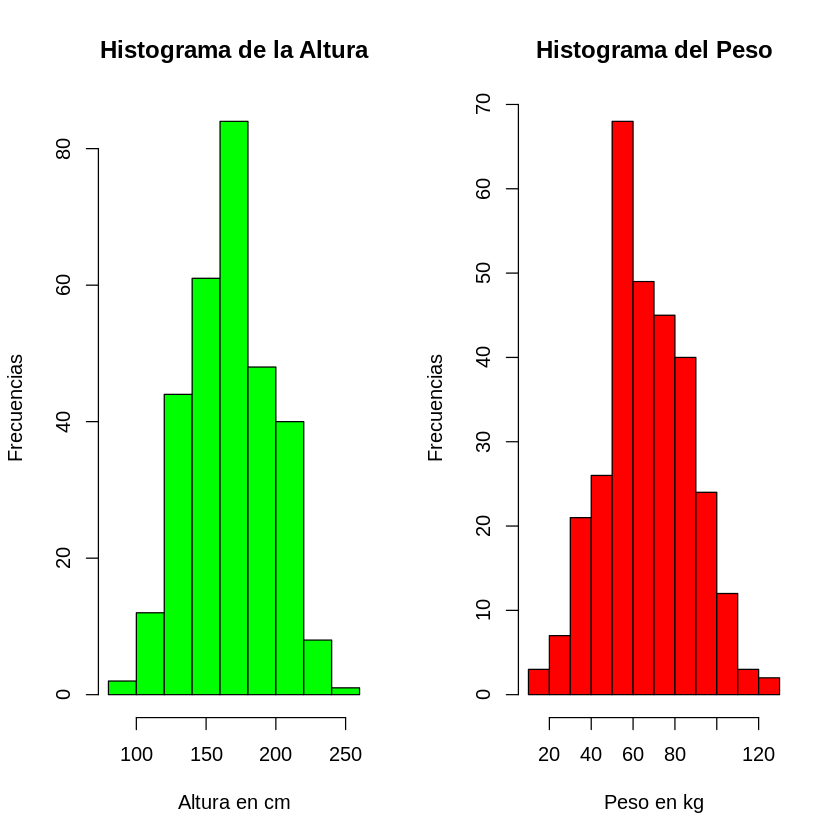

In [ ]:
#Vamos a graficar el histograma para la altura y el peso, usando el subconjunto de datos anterior:
k = 1+log2(nrow(datos_final)) #Regla de Sturges para determinar el número óptimo de barras del histograma: k = 1+ log_2(n). n es el número de observaciones
par(mfrow = c(1,2)) #Para poner dos gráficos uno al lado del otro:
hist(datos_final$Altura, col = "green",
     xlab = "Altura en cm", ylab = "Frecuencias",
     breaks = k, main = "Histograma de la Altura")
hist(datos_final$Peso, col = "red",
     xlab = "Peso en kg", ylab = "Frecuencias",
     breaks = k, main = "Histograma del Peso")

###  Correlación entre variables y diagrama de dispersión (*scatter plot*):

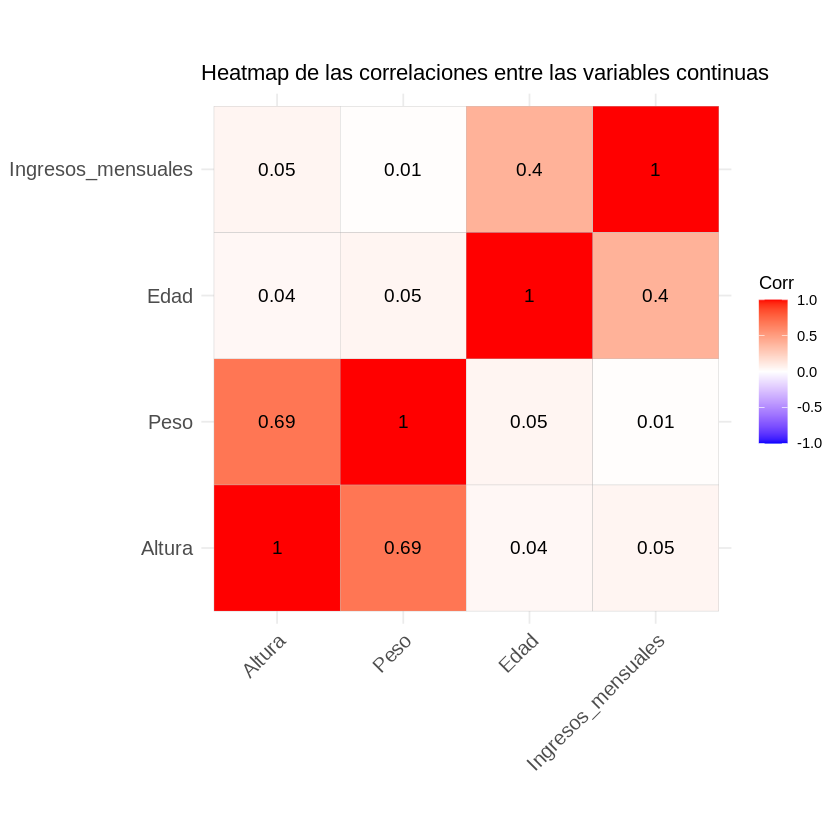

In [ ]:
#Graficamos el mapa de calor (heatmap) de las correlaciones entre las variables continuas (Altura, Peso, Edad e Ingresos mensuales):
variables_continuas = datos_final[,c("Altura", "Peso", "Edad", "Ingresos_mensuales")]
library(ggplot2)
install.packages("ggcorrplot") #Las librerías que no vienen por defecto, como es este caso, debemos instalarlas antes de cargarlas. Solo es necesario instalarlas y cargarlas una vez por sesión
library(ggcorrplot)
ggcorrplot(cor(variables_continuas), lab=T, title="Heatmap de las correlaciones entre las variables continuas")

[1] 0.6911255

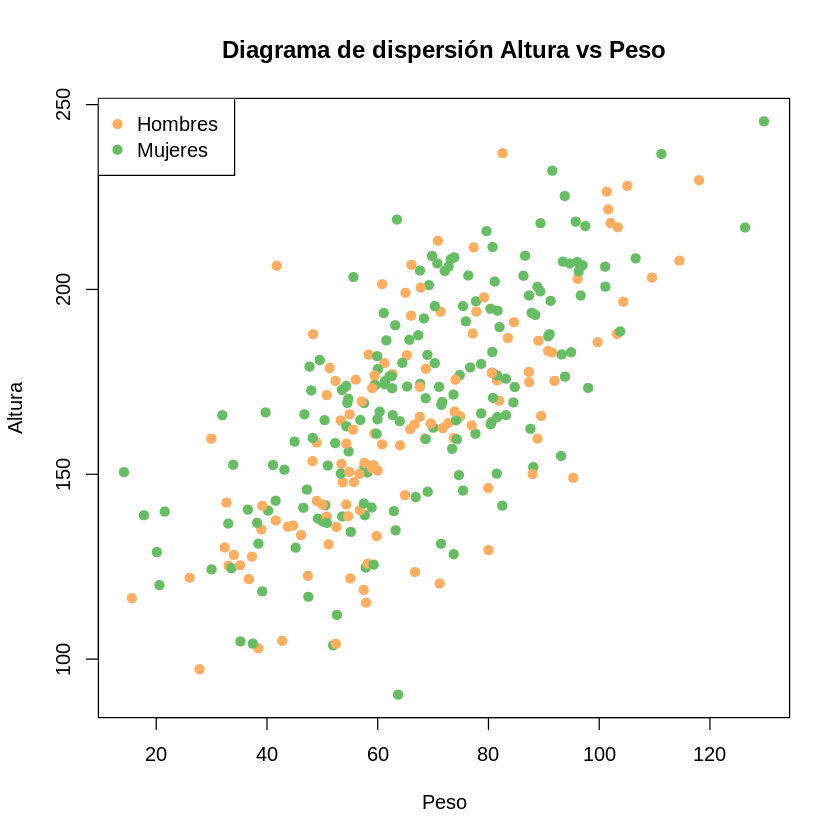

In [ ]:
#Vamos a graficar ahora el diagrama de dispersión entre las variables Altura y Peso
colores <- c("#FDAE61", #Naranja
            "#66BD63") #Verde oscuro
plot(datos_final$Altura ~ datos_final$Peso,
    xlab="Peso", ylab="Altura", main="Diagrama de dispersión Altura vs Peso",
    col=colores[factor(datos_final$Sexo)], pch = 19)
legend("topleft",
       legend = c("Hombres", "Mujeres"),
       pch = 19,
       col = colores)

### Diagrama de caja y bigotes (*box-plot*):
Este tipo de gráfico resumen mucha información en poco espacio, siendo muy útil para la detección de outliers.

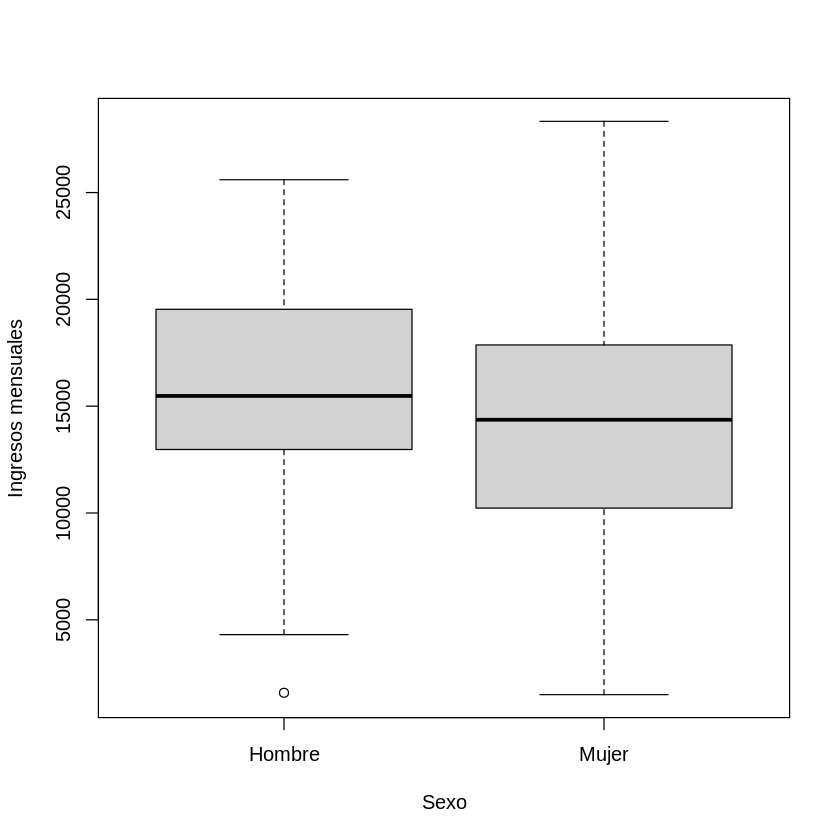

In [ ]:
#Hacemos el box-plot de los ingresos por sexo
boxplot(datos_final$Ingresos_mensuales ~ datos_final$Sexo,
        ylab="Ingresos mensuales", xlab="Sexo")
#La ralla negrita es la mediana
#El circulito por debajo del box-plot de los hombres son outliers